In [1]:
from Data_loader import dummy_enc, dummy_enc_y
from Data_imputation import knn_imputer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from FeatureSelection import PCA_data, Kernal_PCA, TrSVD
from decision_tree_Classifiers import dt_kn_classifier_pca, dt_kn_classifier_pca_kfold, dt_kn_classifier_pca_stratfold
from GridSearch_params import split_data
import warnings
warnings.filterwarnings("ignore")

In [2]:
X_data = pd.read_csv("mushroom_trn_data.csv")
X_data_labels = pd.read_csv("mushroom_trn_class_labels.csv", header = None)
y = X_data_labels.drop(0, axis = 1)

In [4]:
import numpy as np

In [7]:
X_data['stalk-root'] = X_data['stalk-root'].replace('?', np.nan)

In [8]:
X_data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,f,y,g,t,n,f,c,b,n,t,...,s,p,w,p,w,o,p,n,y,d
1,f,f,e,t,n,f,c,b,p,t,...,s,g,g,p,w,o,p,k,v,d
2,f,s,g,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,k,a,g
3,x,s,w,f,c,f,w,n,u,e,...,s,w,w,p,w,o,p,n,v,d
4,x,s,n,f,s,f,c,n,b,t,...,k,p,p,p,w,o,e,w,v,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,x,f,e,t,n,f,c,b,p,t,...,s,p,g,p,w,o,p,n,v,d
7307,x,y,n,f,n,f,w,n,w,e,...,f,w,n,p,w,o,e,w,v,l
7308,f,f,w,f,n,f,w,b,p,t,...,s,w,w,p,w,o,e,k,a,g
7309,x,f,g,t,n,f,c,b,w,t,...,s,g,p,p,w,o,p,n,y,d


In [10]:
sscaler = StandardScaler()
X_data_enc = dummy_enc(X_data)
x_data_mean = X_data_enc
X_data_sc = sscaler.fit_transform(x_data_mean)

In [11]:
x_data_pca = PCA_data(X_data_sc)

In [12]:
x_tr, x_te, y_tr, y_te = split_data(x_data_pca, y)

Decision Tree Classifier without using any Cross-Validation Technique and PCA Feature Selection
Classification Report
              precision    recall  f1-score   support

           e       0.97      0.97      0.97       747
           p       0.97      0.97      0.97       716

    accuracy                           0.97      1463
   macro avg       0.97      0.97      0.97      1463
weighted avg       0.97      0.97      0.97      1463

Plotting the Confusion Matrix


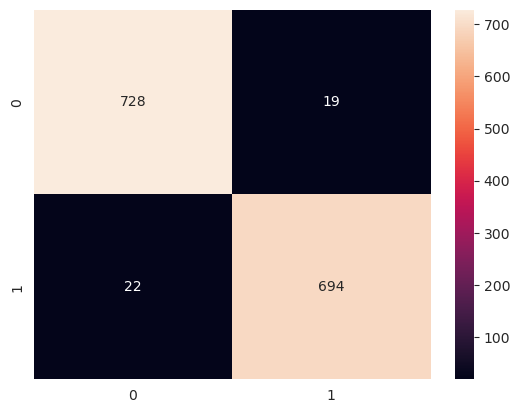

In [13]:
dt_kn_classifier_pca(x_tr, x_te, y_tr, y_te)

Decision Tree Classifier with K-Fold Cross-Validation Technique(K = 10) and PCA Feature Extraction
Classification Report
	Precision Score(Macro): 0.97
	Precision Score(Weighted): 0.97

	Recall Score(Macro): 0.97
	Recall Score(Weighted): 0.97

	F1 Score(Macro): 0.97
	F1 Score(Weighted): 0.97
	Accuracy Score: 0.97
Plotting the Confusion Matrix


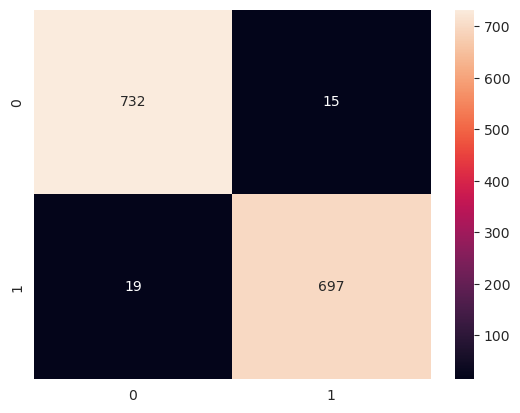

In [14]:
dt_kn_classifier_pca_kfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

Decision Tree Classifier with Stratified K-Fold Cross-Validation Technique and PCA Feature Extraction Technique
Classification Report
	Precision Score(Macro): 0.97
	Precision Score(Weighted): 0.97

	Recall Score(Macro): 0.97
	Recall Score(Weighted): 0.97

	F1 Score(Macro): 0.97
	F1 Score(Weighted): 0.97
	Accuracy Score: 0.97
Plotting the Confusion Matrix


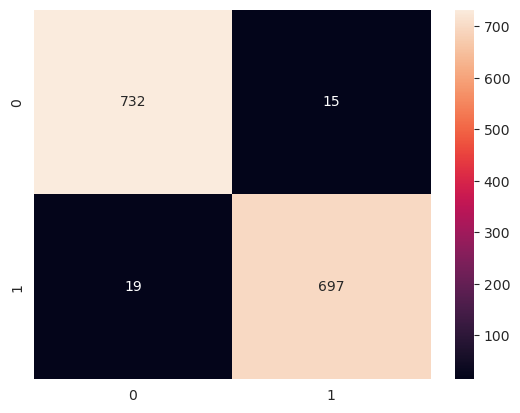

In [15]:
dt_kn_classifier_pca_stratfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

In [16]:
from random_forest_classifier import rft_kn_classifier_pca, rft_kn_classifier_pca_kfold, rft_kn_classifier_pca_stratfold

Random Forest Tree Classifier without using any Cross-Validation Technique and PCA Feature Selection
Classification Report
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       747
           p       1.00      1.00      1.00       716

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463

Plotting the Confusion Matrix


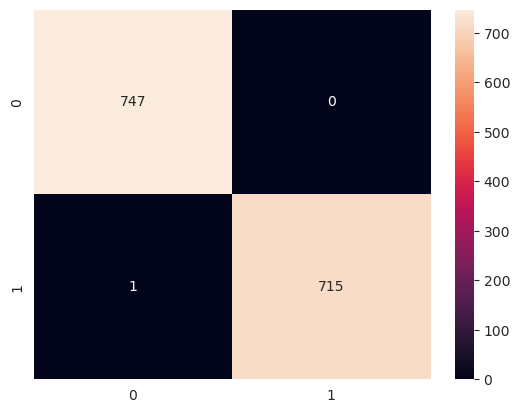

In [17]:
rft_kn_classifier_pca(x_tr, x_te, y_tr, y_te)

Random Forest Tree Classifier with K-Fold Cross-Validation Technique(K = 10) and PCA Feature Extraction
Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00
	Accuracy Score: 1.00
Plotting the Confusion Matrix


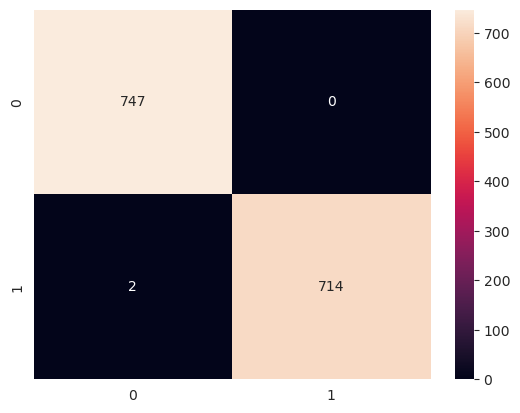

In [18]:
rft_kn_classifier_pca_kfold(x_data_pca,y,  x_tr, x_te, y_tr, y_te)

Random Forest Tree Classifier with Stratified K-Fold Cross-Validation Technique and PCA Feature Extraction Technique
Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00
	Accuracy Score: 1.00
Plotting the Confusion Matrix


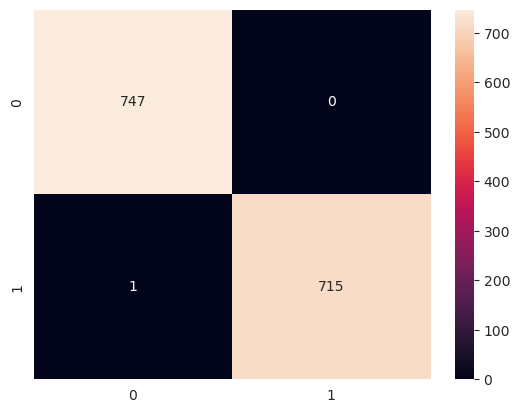

In [19]:
rft_kn_classifier_pca_stratfold(x_data_pca, y,x_tr, x_te, y_tr, y_te )

In [20]:
from logistic_regression_classifier import lr_kn_classifier_pca, lr_kn_classifier_pca_kfold, lr_kn_classifier_pca_stratfold

Logistic Regression Classifier without using any Cross-Validation Technique and PCA Feature Selection
Classification Report
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       747
           p       1.00      1.00      1.00       716

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463

Plotting the Confusion Matrix


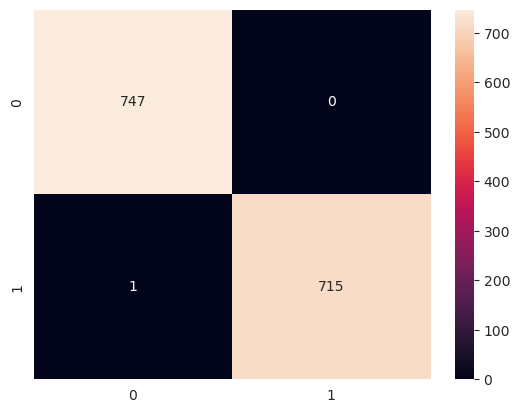

In [21]:
lr_kn_classifier_pca(x_tr, x_te, y_tr, y_te)

Random Forest Tree Classifier with K-Fold Cross-Validation Technique(K = 10) and PCA Feature Extraction
Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00
	Accuracy Score: 1.00
Plotting the Confusion Matrix


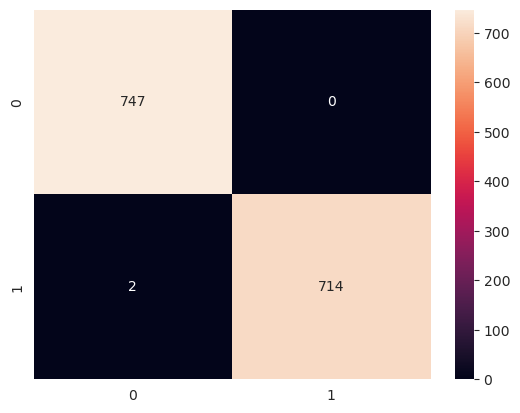

In [22]:
lr_kn_classifier_pca_kfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

Logistic Regression Classifier with Stratified K-Fold Cross-Validation Technique and PCA Feature Extraction Technique
Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00
	Accuracy Score: 1.00
Plotting the Confusion Matrix


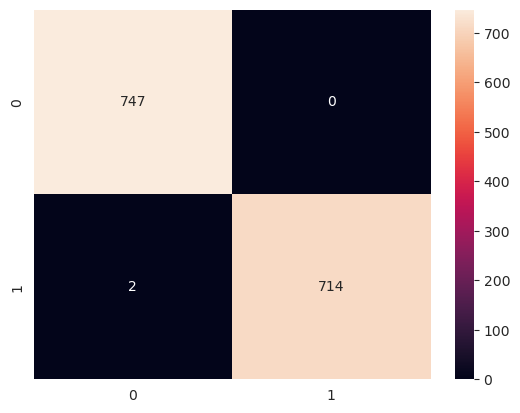

In [23]:
lr_kn_classifier_pca_stratfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

In [27]:
y_enc = dummy_enc_y(y)
x_tr_y, x_te_y, y_tr_y, y_te_y = split_data(x_data_pca, y_enc)

In [25]:
from XGBoost_classifier import xgb_kn_classifier_pca, xgb_kn_classifier_pca_kfold, xgb_kn_classifier_pca_stratfold

XGBoosting Classifier without using any Cross-Validation Technique and PCA Feature Selection
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       747
           1       1.00      1.00      1.00       716

   micro avg       1.00      1.00      1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463
 samples avg       1.00      1.00      1.00      1463

Plotting the Confusion Matrix


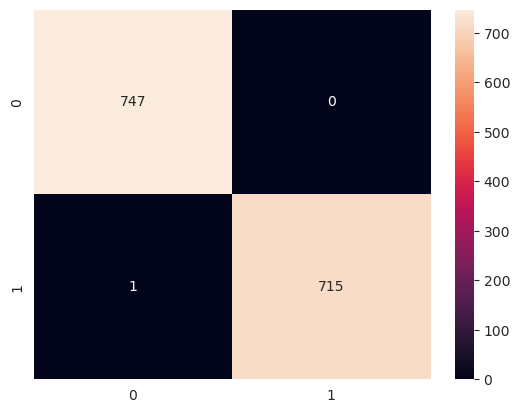

In [28]:
xgb_kn_classifier_pca(x_tr_y, x_te_y, y_tr_y, y_te_y)

XGBoosting Classifier with K-Fold Cross-Validation Technique(K = 10) and PCA Feature Extraction
Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00
	Accuracy Score: 1.00
Plotting the Confusion Matrix


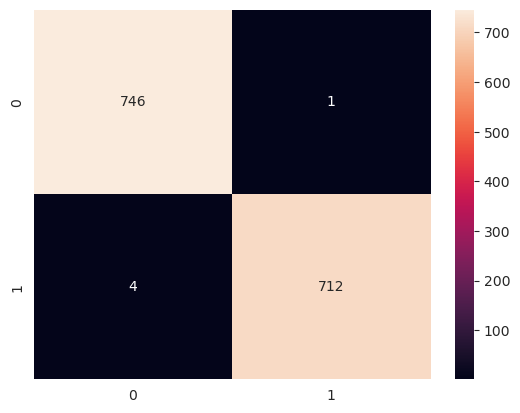

In [29]:
xgb_kn_classifier_pca_kfold(x_data_pca, y_enc, x_tr_y, x_te_y, y_tr_y, y_te_y)

XGBoosting with Stratified K-Fold Cross-Validation Technique and PCA Feature Extraction Technique
Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00
	Accuracy Score: 1.00
Plotting the Confusion Matrix


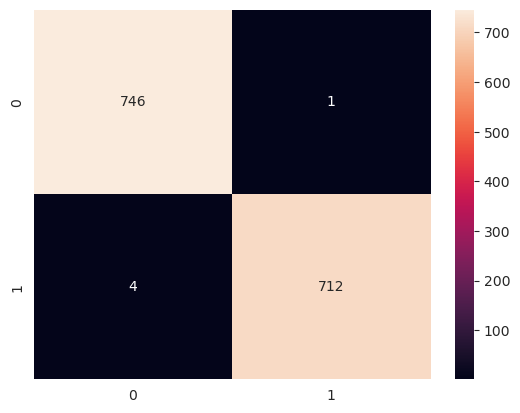

In [30]:
xgb_kn_classifier_pca_stratfold(x_data_pca, y_enc, x_tr_y, x_te_y, y_tr_y, y_te_y)